In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

url = "online+shoppers+purchasing+intention+dataset/online_shoppers_intention.csv"
df = pd.read_csv(url)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


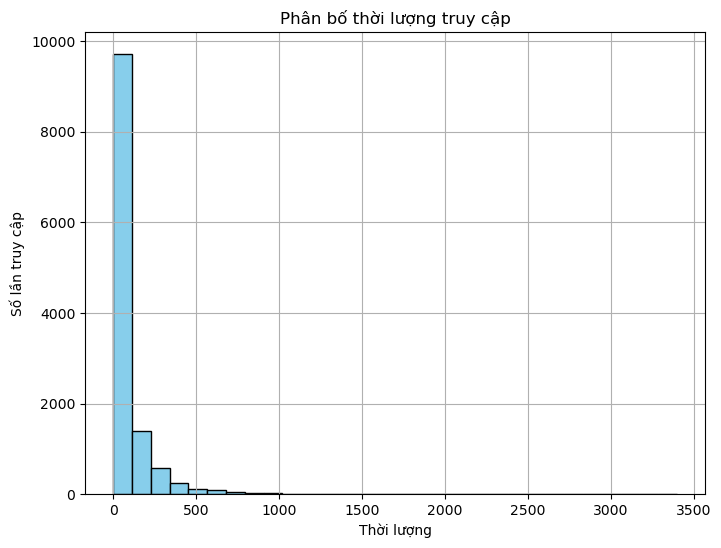

In [10]:
import matplotlib.pyplot as plt

#vẽ ví dụ biểu đồ
plt.figure(figsize=(8,6))
plt.hist(df['Administrative_Duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Phân bố thời lượng truy cập')
plt.xlabel('Thời lượng')
plt.ylabel('Số lần truy cập')
plt.grid(True)
plt.show()


In [11]:
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [4]:
# chuyển text sang số cho đỡ sai
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Chuẩn hóa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia train test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [12]:
#train
model = RandomForestClassifier(n_estimators=100, random_state=42) #bài toàn yes no để xử lý thường dùng RandomForestClassifier
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=90, random_state=42)

Accuracy: 0.8961881589618816

Classification:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.77      0.54      0.63       411

    accuracy                           0.90      2466
   macro avg       0.84      0.75      0.79      2466
weighted avg       0.89      0.90      0.89      2466



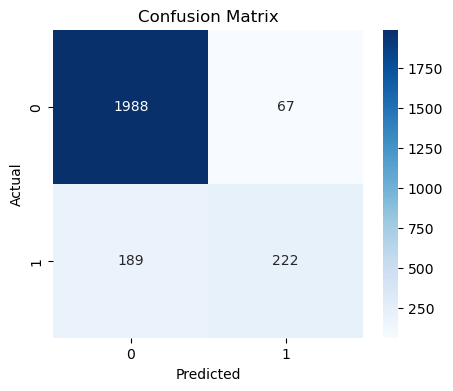

In [13]:
#đánh giá
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification:\n", classification_report(y_test, y_pred))

# mt nhầm lẫn confu
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
